Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.datasets import cifar10
from tensorflow.keras.utils import plot_model

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
train_images.shape

(50000, 32, 32, 3)

In [4]:
test_images.shape

(10000, 32, 32, 3)

In [5]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

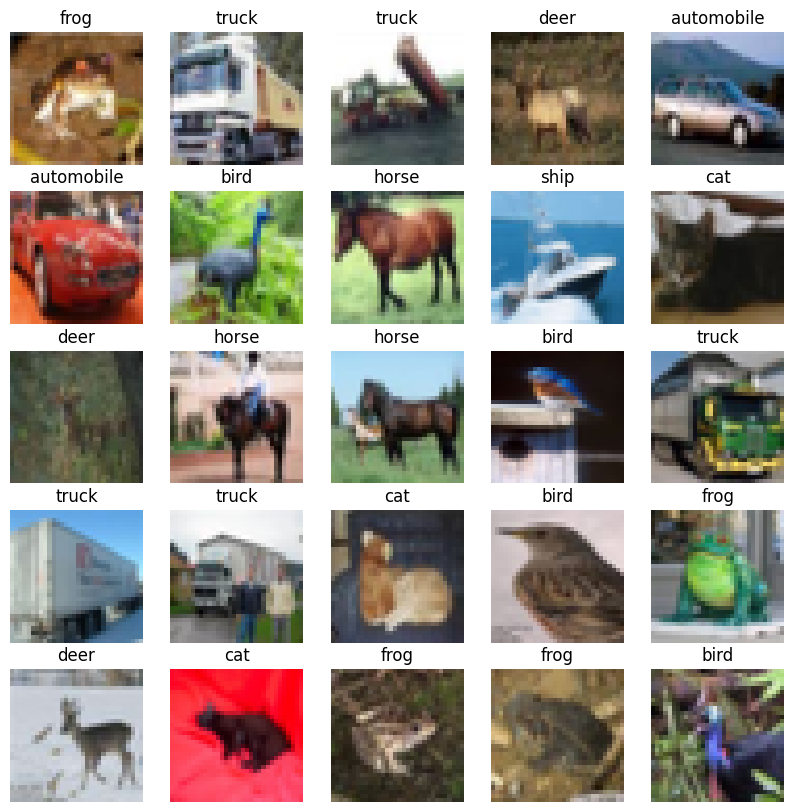

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(train_images[i])
  plt.title(labels[train_labels[i][0]])
  plt.axis('off')

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [8]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [9]:
test_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [10]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print('Train size: ', train_ds_size)
print('Test size: ', test_ds_size)

Train size:  50000
Test size:  10000


In [11]:
def process_images(image, label):
  image = tf.image.per_image_standardization(image)
  image = tf.image.resize(image, (64, 64))
  return image, label

In [12]:
# apply the image processing function to all the images
train_ds = train_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder=True)
test_ds = test_ds.map(process_images).shuffle(buffer_size=test_ds_size).batch(batch_size=32, drop_remainder=True)

In [13]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(32, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.uint8, name=None))>

In [14]:
test_ds

<_BatchDataset element_spec=(TensorSpec(shape=(32, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(32, 1), dtype=tf.uint8, name=None))>

Create AlexNet Archietucture

In [15]:
model = Sequential([
    Conv2D(filters=128, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(3, 3)),
    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=1024, activation='relu'),
    Dropout(0.5),
    Dense(units=1024, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 128)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 256)         1024      
 chNormalization)                                                
                                                        

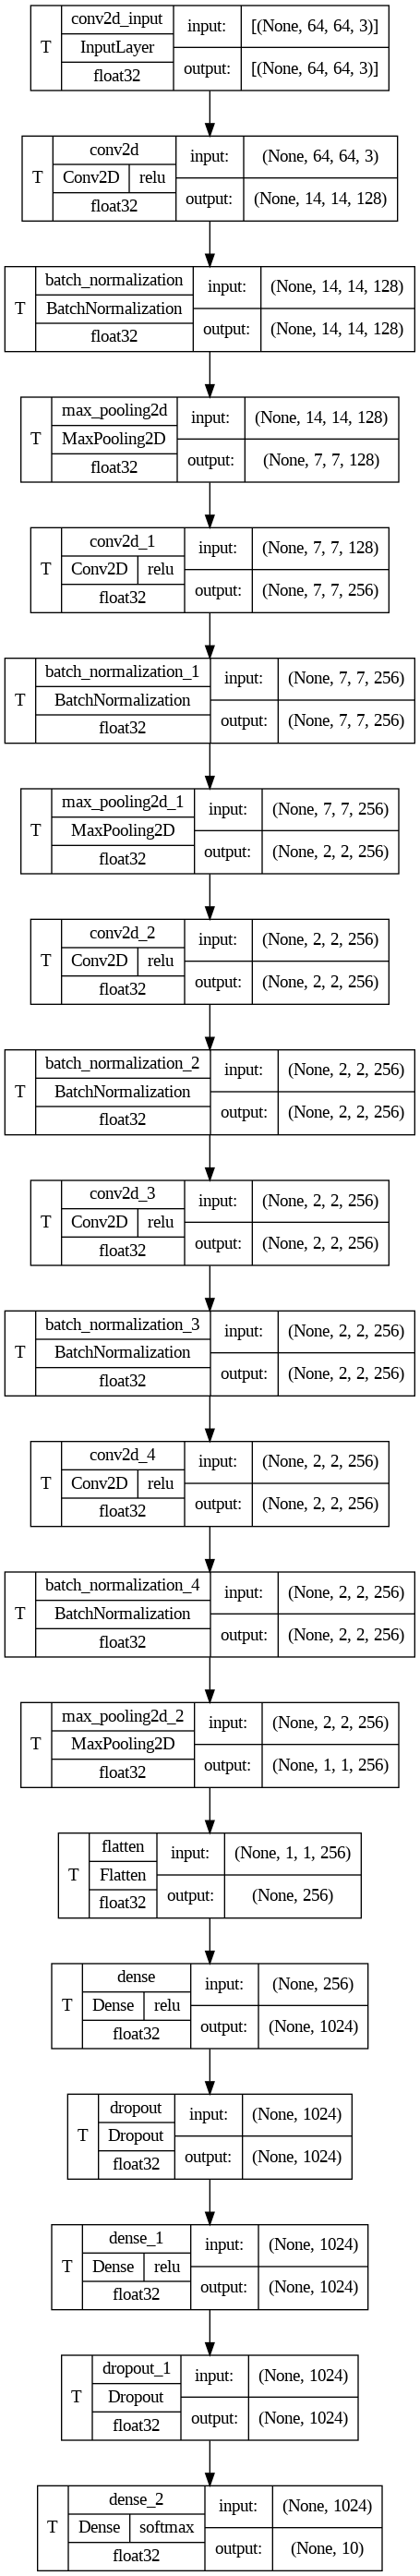

In [17]:
plot_model(model, show_shapes=True, show_layer_names=True, show_dtype=True, show_layer_activations=True, show_trainable=True)

In [18]:
model.compile(optimizer= tf.optimizers.SGD(learning_rate= 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
1562/1562 [==============================] - 34s 9ms/step - loss: 2.1558 - accuracy: 0.2500 - val_loss: 1.6067 - val_accuracy: 0.4290
Epoch 2/10
1562/1562 [==============================] - 17s 8ms/step - loss: 1.7142 - accuracy: 0.3810 - val_loss: 1.4309 - val_accuracy: 0.4831
Epoch 3/10
1562/1562 [==============================] - 19s 9ms/step - loss: 1.5325 - accuracy: 0.4496 - val_loss: 1.3238 - val_accuracy: 0.5284
Epoch 4/10
1562/1562 [==============================] - 17s 9ms/step - loss: 1.4028 - accuracy: 0.4981 - val_loss: 1.2450 - val_accuracy: 0.5528
Epoch 5/10
1562/1562 [==============================] - 20s 10ms/step - loss: 1.3018 - accuracy: 0.5358 - val_loss: 1.1729 - val_accuracy: 0.5895
Epoch 6/10
1562/1562 [==============================] - 17s 8ms/step - loss: 1.2209 - accuracy: 0.5666 - val_loss: 1.1172 - val_accuracy: 0.6062
Epoch 7/10
1562/1562 [==============================] - 16s 8ms/step - loss: 1.1432 - accuracy: 0.5935 - val_loss: 1.0939 - val_a

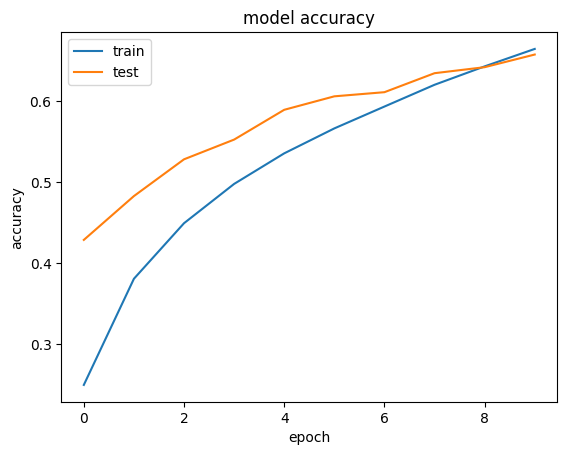

In [20]:
# plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()